##DESCRIPTIVE ANALYSIS##

In [ ]:
import pandas as pd
from nltk.tag import pos_tag
import matplotlib.pyplot as plylot
from collections import defaultdict,Counter
from nltk.stem import WordNetLemmatizer
from datetime import datetime
from tqdm import tqdm
import numpy as np
import re
import os
tqdm.pandas()

# nltk imports, note that these outputs may be different if you are using colab or local jupyter notebooks
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

# load stopwords
sw = set(stopwords.words('english'))

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


All files `final.csv, us_dev.labels, us_dev.text, us_test.labels, us_test.text, us_train.labels, us_test.csv, us_dev.csv and us_train.text` need to be in Google Drive under 'My Drive.' for the codes to run 

In [ ]:
# Importing depedencies and libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plylot
import re
import os

In [ ]:
#Connecting to google drive to access datasets 
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Loading datasets 
dataSet = pd.read_csv('/content/gdrive/My Drive/final.csv')
header_list = ["Emoji"]
dataSet_test = pd.read_csv('/content/gdrive/My Drive/us_test.csv',names=header_list)
e_dataSet_dev = pd.read_csv('/content/gdrive/My Drive/us_dev.csv',names=header_list)

print( dataSet.head(20))

**Labels data analysis**

**DESCRIPTIVE ANALYSIS**


**Counts Of Each Emoji Types:Train**

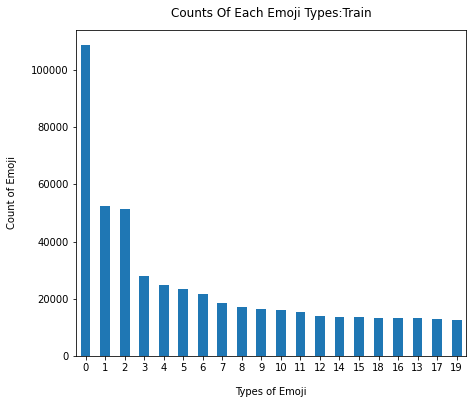

In [ ]:
# Emoji frequency count:Train
dataSet['label'].value_counts().plot(kind='bar',figsize=(7,6),rot=0)
plylot.xlabel("Types of Emoji", labelpad=14)
plylot.ylabel("Count of Emoji", labelpad=14)
plylot.title("Counts Of Each Emoji Types:Train",y=1.02);

In [ ]:
# statistical summary of train labels data
dataSet.describe()

**Counts Of Each Emoji Types:Test**

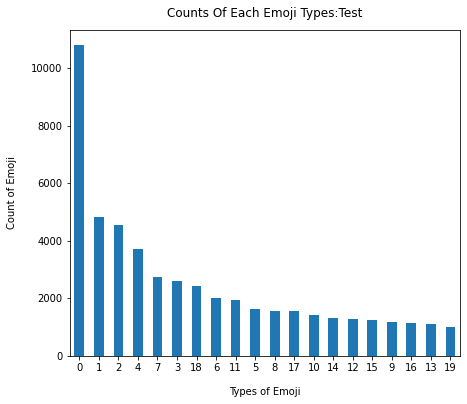

In [ ]:
# Emoji frequency count:Test
dataSet_test['Emoji'].value_counts().plot(kind='bar',figsize=(7,6),rot=0)
plylot.xlabel("Types of Emoji", labelpad=14)
plylot.ylabel("Count of Emoji", labelpad=14)
plylot.title("Counts Of Each Emoji Types:Test",y=1.02);

In [ ]:
# statistical summary of test labels data
dataSet_test.describe()

,Imoji
count,50000.000000
mean,6.172040
std,6.028457
min,0.000000
25%,1.000000
50%,4.000000
75%,11.000000
max,19.000000


**Counts Of Each Emoji Types:Validation**

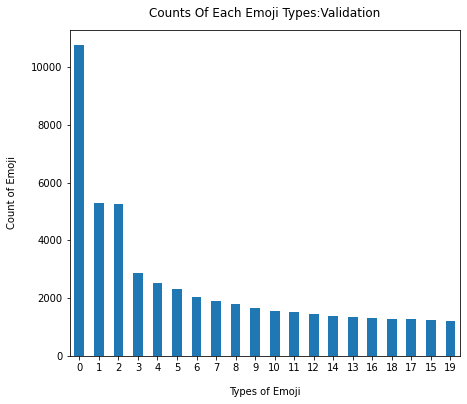

In [ ]:
# Emoji frequency count:validate
e_dataSet_dev['Emoji'].value_counts().plot(kind='bar',figsize=(7,6),rot=0)
plylot.xlabel("Types of Emoji", labelpad=14)
plylot.ylabel("Count of Emoji", labelpad=14)
plylot.title("Counts Of Each Emoji Types:Validation",y=1.02);

In [ ]:
# statistical summary of validation labels data
e_dataSet_dev.describe()

,Imoji
count,50000.000000
mean,5.903680
std,5.851024
min,0.000000
25%,1.000000
50%,4.000000
75%,10.000000
max,19.000000


**Text data analysis**

In [ ]:
# Training Set

with open('/content/gdrive/My Drive/us_train.text', mode='r') as t: # Upload these files to your Google Drive
  data = t.read()
  print(data[:200])

Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice 
Time for some BBQ and whiskey libations. Chomp, belch, chomp! (@ Lucille's Smokehouse Bar-B-Que) 
Love love 


In [ ]:
# Test Set

with open('/content/gdrive/My Drive/us_test.text', mode='r') as t2:  # Upload these files to your Google Drive
  data2 = t2.read()
  print(data2[:200])

en Pelham Parkway
The calm before...... | w/ sofarsounds @user | : B. Hall.......#sofarsounds…
Just witnessed the great solar eclipse @ Tampa, Florida
This little lady is 26 weeks pregnant today! Exci


In [ ]:
# Validation set

with open('/content/gdrive/My Drive/us_dev.text', mode='r') as t3:  # Upload these files to your Google Drive
  data3 = t3.read()
  print(data3[:200])

A little throwback with my favourite person @ Water Wall
glam on @user yesterday for #kcon makeup using @user in #featherette,…
Democracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC Ne


In [ ]:
# Training data type & view

print(type(data))
print(type(data2))
print(type(data3))
print(data.split(' ')[:100])
print(data2.split(' ')[:100])
print(data3.split(' ')[:100])

<class 'str'>
<class 'str'>
<class 'str'>
['Sunday', 'afternoon', 'walking', 'through', 'Venice', 'in', 'the', 'sun', 'with', '@user', '️', '️', '️', '@', 'Abbot', 'Kinney,', 'Venice', '\nTime', 'for', 'some', 'BBQ', 'and', 'whiskey', 'libations.', 'Chomp,', 'belch,', 'chomp!', '(@', "Lucille's", 'Smokehouse', 'Bar-B-Que)', '\nLove', 'love', 'love', 'all', 'these', 'people', '️', '️', '️', '#friends', '#bff', '#celebrate', '#blessed', '#sundayfunday', '@', 'San…', '\n️', '️', '️', '️', '@', 'Toys"R"Us', '\nMan', 'these', 'are', 'the', 'funniest', 'kids', 'ever!!', 'That', 'face!', '#HappyBirthdayBubb', '@', 'FLIPnOUT', 'Xtreme', '\n#sandiego', '@', 'San', 'Diego,', 'California', '\nMy', 'little', '️', '️', '️', '️', '️', '#ObsessedWithMyDog', '@', 'Cafe', 'Solstice', 'Capitol', 'Hill', '\nMore', '#tinyepic', 'things', '#tinyepicwestern,', 'this', 'one', 'is', 'crazy', '@user', 'I', 'may', 'be', 'one', 'of', 'your…', '\nLast']
['en', 'Pelham', 'Parkway\nThe', 'calm', 'before......', '|'

**CONVERTING DATA TO DATAFRAME**

In [ ]:
#Converting train data to dataframe 
df=pd.read_table('/content/gdrive/My Drive/us_train.text',header=None)
df.head()
print(df.shape)

(475318, 1)


In [ ]:
#Converting test data to dataframe 
df2=pd.read_table('/content/gdrive/My Drive/us_test.text',header=None)
df2.head()
print(df2.shape)

(48746, 1)


In [ ]:
#Converting validation data to dataframe 
df3=pd.read_table('/content/gdrive/My Drive/us_dev.text',header=None)
df3
print(df3.shape)

(46044, 1)


**WORD CLOUD**

In [ ]:
#Library to form wordcloud :
from wordcloud import WordCloud

#Library to plot the wordcloud :
import matplotlib.pyplot as plt

#Generating the wordcloud :
wordcloud = WordCloud().generate(data)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

In [ ]:
#Library to form wordcloud :
from wordcloud import WordCloud

#Library to plot the wordcloud :
import matplotlib.pyplot as plt

#Generating the wordcloud :
wordcloud = WordCloud().generate(data2)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

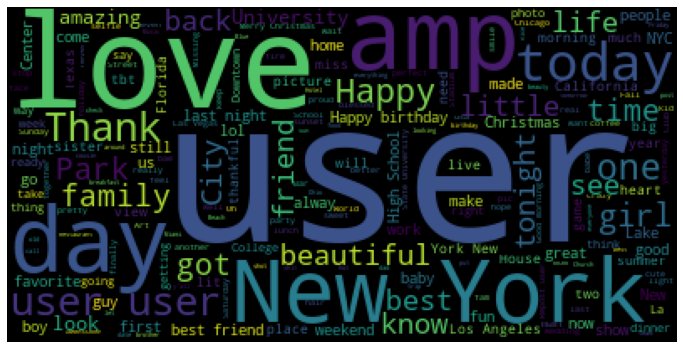

In [ ]:
#Library to form wordcloud :
from wordcloud import WordCloud

#Library to plot the wordcloud :
import matplotlib.pyplot as plt

#Generating the wordcloud :
wordcloud = WordCloud().generate(data3)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

**Word Counts**

In [ ]:
a = len(data.split(' '))
print('Training set word count: ', a)

b = len(data2.split(' '))
print('Testing set word count: ', b)

c = len(data3.split(' '))
print('Dev/Validation set word count: ', c)

Training set word count:  5794828
Testing set word count:  545685
Dev/Validation set word count:  513158


In [ ]:
# total word count
total = len(data) + len(data2) + len(data3)
print(total)

41978387


**Data % split**

In [ ]:
train_ptg = 100*len(data)/total
test_ptg = 100*len(data2)/total
dev_ptg = 100*len(data3)/total
print(train_ptg, test_ptg, dev_ptg)

83.33164397193251 8.611188419412112 8.057167608655378


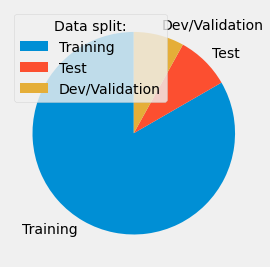

In [ ]:

y = np.array([train_ptg, test_ptg, dev_ptg])
mylabels = ["Training", "Test", "Dev/Validation"]

plt.pie(y, labels = mylabels, startangle = 90)
plt.legend(title = 'Data split:', loc = 'upper left')
plt.subplots_adjust(left=0.001, bottom=0.001)
plt.show()

#Error Analysis & Correction

In [ ]:
#Spell Checker
def real_word_check(wordtuple):
  !pip install -U pyspellchecker
  from spellchecker import SpellChecker
  spell = SpellChecker()
  with open('/content/gdrive/My Drive/words.txt') as word_file:
    english_words = set(word.strip().lower() for word in word_file)
    for word in wordtuple:
      lower_word = word.lower()
      if word.lower() not in english_words:
        print('Word: ' + word)
        print('Correction: ' + spell.correction(word))
        #print corrected word/suggested correction

In [ ]:
real_word_check("test blest bots")

     |████████████████████████████████| 2.7MB 29.2MB/s 
Word:  
Correction: i
Word:  
Correction: i


**References:**


https://raw.githubusercontent.com/dwyl/english-words/master/words.txt (word file)

##HashTag Sorting

In [ ]:
#Hashtag sorting
import re
from collections import Counter

def viterbi_segment(text):
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
                        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]

def word_prob(word): return dictionary[word] / total
def words(text): return re.findall('[a-z]+', text.lower()) 
dictionary = Counter(words(open('/content/gdrive/My Drive/big.txt').read()))
max_word_length = max(map(len, dictionary))
total = float(sum(dictionary.values()))

In [ ]:
f = open("us_train.text","r", encoding = "UTF8")
line = f.readlines()
print(line)
f.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df = pd.DataFrame({"txt" : line})
df

,txt
0,Sunday afternoon walking through Venice in the...
1,Time for some BBQ and whiskey libations. Chomp...
2,Love love love all these people ️ ️ ️ #friends...
3,"️ ️ ️ ️ @ Toys""R""Us \n"
4,Man these are the funniest kids ever!! That fa...
...,...
499995,"Angel Baby #ella #greenville @ Greenville, Nor..."
499996,@user fight who bob?? \n
499997,oh. My. Goodness. @ Chili's Grill &amp; Bar \n
499998,Missing my baby already :( C u in a month @ Ba...


In [ ]:
df['hash_tag'] = df['txt'].apply(lambda x : re.findall("#{1}[a-zA-Z]+",str(x)))
df

,txt,hash_tag
0,Sunday afternoon walking through Venice in the...,[]
1,Time for some BBQ and whiskey libations. Chomp...,[]
2,Love love love all these people ️ ️ ️ #friends...,"[#friends, #bff, #celebrate, #blessed, #sunday..."
3,"️ ️ ️ ️ @ Toys""R""Us \n",[]
4,Man these are the funniest kids ever!! That fa...,[#HappyBirthdayBubb]
...,...,...
499995,"Angel Baby #ella #greenville @ Greenville, Nor...","[#ella, #greenville]"
499996,@user fight who bob?? \n,[]
499997,oh. My. Goodness. @ Chili's Grill &amp; Bar \n,[]
499998,Missing my baby already :( C u in a month @ Ba...,[]


In [ ]:
def f(x):
    return re.sub("#","",x)

df['hash_tag1'] = df['hash_tag'].apply(lambda x : list(map(f,x)))
df

,txt,hash_tag,hash_tag1
0,Sunday afternoon walking through Venice in the...,[],[]
1,Time for some BBQ and whiskey libations. Chomp...,[],[]
2,Love love love all these people ️ ️ ️ #friends...,"[#friends, #bff, #celebrate, #blessed, #sunday...","[friends, bff, celebrate, blessed, sundayfunday]"
3,"️ ️ ️ ️ @ Toys""R""Us \n",[],[]
4,Man these are the funniest kids ever!! That fa...,[#HappyBirthdayBubb],[HappyBirthdayBubb]
...,...,...,...
499995,"Angel Baby #ella #greenville @ Greenville, Nor...","[#ella, #greenville]","[ella, greenville]"
499996,@user fight who bob?? \n,[],[]
499997,oh. My. Goodness. @ Chili's Grill &amp; Bar \n,[],[]
499998,Missing my baby already :( C u in a month @ Ba...,[],[]


In [ ]:
test = df.iloc[:300,:]

In [ ]:
test['hash_tag_clean'] = test['hash_tag1'].apply(lambda x : list(map(viterbi_segment,x)))
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,txt,hash_tag,hash_tag1,hash_tag_clean
0,Sunday afternoon walking through Venice in the...,[],[],[]
1,Time for some BBQ and whiskey libations. Chomp...,[],[],[]
2,Love love love all these people ️ ️ ️ #friends...,"[#friends, #bff, #celebrate, #blessed, #sunday...","[friends, bff, celebrate, blessed, sundayfunday]","[([friends], 0.00017624152881177963), ([b, ff]..."
3,"️ ️ ️ ️ @ Toys""R""Us \n",[],[],[]
4,Man these are the funniest kids ever!! That fa...,[#HappyBirthdayBubb],[HappyBirthdayBubb],"[([H, a, p, p, y, B, i, r, t, h, d, a, y, B, u..."
...,...,...,...,...
295,Great birthday lunch with an even greater fam ...,[],[],[]
296,A Royal Tribute To Our a Purple One... #Reside...,"[#Resident, #Prince, #Tribute, #Honour]","[Resident, Prince, Tribute, Honour]","[([R, e, s, i, d, e, n, t], 0.0), ([P, r, i, n..."
297,"Spent the day looking at open houses, oh the j...",[],[],[]
298,Happy Sunday @ San Diego Temple \n,[],[],[]


# Pre-Processing

In [ ]:
# Importing data 

f = open("/content/gdrive/My Drive/us_train.text","r", encoding = "UTF8")
line = f.readlines()
print(line)
f.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df = pd.DataFrame({"txt" : line})
df

In [ ]:
df['txt'] = df['txt'].apply(lambda x : re.sub("@user","",x))

In [ ]:
# Cleaning text 

df['txt_clean1'] = df['txt'].apply(lambda x : re.sub("[^a-zA-Z ]","",x))
df

,txt,txt_clean1
0,Sunday afternoon walking through Venice in the...,Sunday afternoon walking through Venice in the...
1,Time for some BBQ and whiskey libations. Chomp...,Time for some BBQ and whiskey libations Chomp ...
2,Love love love all these people ️ ️ ️ #friends...,Love love love all these people friends bff...
3,"️ ️ ️ ️ @ Toys""R""Us \n",ToysRUs
4,Man these are the funniest kids ever!! That fa...,Man these are the funniest kids ever That face...
...,...,...
499995,"Angel Baby #ella #greenville @ Greenville, Nor...",Angel Baby ella greenville Greenville North C...
499996,fight who bob?? \n,fight who bob
499997,oh. My. Goodness. @ Chili's Grill &amp; Bar \n,oh My Goodness Chilis Grill amp Bar
499998,Missing my baby already :( C u in a month @ Ba...,Missing my baby already C u in a month Barcl...


In [ ]:
df['txt_clean2'] = df['txt_clean1'].apply(lambda x : x.lower())
df

,txt,txt_clean1,txt_clean2
0,Sunday afternoon walking through Venice in the...,Sunday afternoon walking through Venice in the...,sunday afternoon walking through venice in the...
1,Time for some BBQ and whiskey libations. Chomp...,Time for some BBQ and whiskey libations Chomp ...,time for some bbq and whiskey libations chomp ...
2,Love love love all these people ️ ️ ️ #friends...,Love love love all these people friends bff...,love love love all these people friends bff...
3,"️ ️ ️ ️ @ Toys""R""Us \n",ToysRUs,toysrus
4,Man these are the funniest kids ever!! That fa...,Man these are the funniest kids ever That face...,man these are the funniest kids ever that face...
...,...,...,...
499995,"Angel Baby #ella #greenville @ Greenville, Nor...",Angel Baby ella greenville Greenville North C...,angel baby ella greenville greenville north c...
499996,fight who bob?? \n,fight who bob,fight who bob
499997,oh. My. Goodness. @ Chili's Grill &amp; Bar \n,oh My Goodness Chilis Grill amp Bar,oh my goodness chilis grill amp bar
499998,Missing my baby already :( C u in a month @ Ba...,Missing my baby already C u in a month Barcl...,missing my baby already c u in a month barcl...


In [ ]:
df['txt_token'] = df['txt_clean2'].apply(lambda x : word_tokenize(x))
df['txt_token']

0         [sunday, afternoon, walking, through, venice, ...
1         [time, for, some, bbq, and, whiskey, libations...
2         [love, love, love, all, these, people, friends...
3                                                 [toysrus]
4         [man, these, are, the, funniest, kids, ever, t...
                                ...                        
499995    [angel, baby, ella, greenville, greenville, no...
499996                                    [fight, who, bob]
499997          [oh, my, goodness, chilis, grill, amp, bar]
499998    [missing, my, baby, already, c, u, in, a, mont...
499999    [last, stop, before, going, back, to, cali, pu...
Name: txt_token, Length: 500000, dtype: object

In [ ]:
df['txt_clean3'] = df['txt_token'].apply(lambda x : [i for i in x if i not in sw ])
df['txt_clean3']

0         [sunday, afternoon, walking, venice, sun, abbo...
1         [time, bbq, whiskey, libations, chomp, belch, ...
2         [love, love, love, people, friends, bff, celeb...
3                                                 [toysrus]
4         [man, funniest, kids, ever, face, happybirthda...
                                ...                        
499995    [angel, baby, ella, greenville, greenville, no...
499996                                         [fight, bob]
499997              [oh, goodness, chilis, grill, amp, bar]
499998    [missing, baby, already, c, u, month, barclays...
499999    [last, stop, going, back, cali, purlisse, new,...
Name: txt_clean3, Length: 500000, dtype: object

# Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
s = PorterStemmer()
[s.stem(w) for w in df['txt_clean_final'][0]]

In [ ]:
[s.stem(w) for w in df['txt_clean_final'][0]]

In [ ]:
df['txt_clean_stemming'] = df['txt_clean_stemming'].apply(lambda x :[s.stem(w) for w in x])
df['txt_clean_stemming']

# Lemmatization

In [ ]:
pt = pos_tag(df['txt_clean3'][0])
pt

[('sunday', 'JJ'),
 ('afternoon', 'NN'),
 ('walking', 'VBG'),
 ('venice', 'NN'),
 ('sun', 'NN'),
 ('abbot', 'NN'),
 ('kinney', 'NN'),
 ('venice', 'NN')]

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
n=WordNetLemmatizer()
f = lambda x : n.lemmatize(x[0],'v') if (x[1][0] == "V" ) or (x[1] == 'RB') else n.lemmatize(x[0]) 
list(map(f,pt))

['sunday', 'afternoon', 'walk', 'venice', 'sun', 'abbot', 'kinney', 'venice']

In [ ]:
def clean_dt_with_postag(data):
    pt = pos_tag(data)
    f = lambda x : n.lemmatize(x[0],'v') if (x[1][0] == "V" ) or (x[1] == 'RB') else n.lemmatize(x[0]) 
    return(list(map(f,pt)))

In [ ]:
# Works but takes a very long time to run 

# df['txt_clean3'] = df['txt_clean3'].apply(lambda x : clean_dt_with_postag(x))
# df

In [ ]:
" ".join(df['txt_clean3'][499998])

'missing baby already c u month barclays center kygo live'

# Matrix

In [ ]:
docs = list(df['txt_clean3'])
docs

[['sunday',
  'afternoon',
  'walking',
  'venice',
  'sun',
  'abbot',
  'kinney',
  'venice'],
 ['time',
  'bbq',
  'whiskey',
  'libations',
  'chomp',
  'belch',
  'chomp',
  'lucilles',
  'smokehouse',
  'barbque'],
 ['love',
  'love',
  'love',
  'people',
  'friends',
  'bff',
  'celebrate',
  'blessed',
  'sundayfunday',
  'san'],
 ['toysrus'],
 ['man',
  'funniest',
  'kids',
  'ever',
  'face',
  'happybirthdaybubb',
  'flipnout',
  'xtreme'],
 ['sandiego', 'san', 'diego', 'california'],
 ['little', 'obsessedwithmydog', 'cafe', 'solstice', 'capitol', 'hill'],
 ['tinyepic', 'things', 'tinyepicwestern', 'one', 'crazy', 'may', 'one'],
 ['last', 'night', 'omnia', 'night', 'club', 'caesars', 'palace'],
 ['friendship',
  'finest',
  'pixar',
  'toystory',
  'buzz',
  'woody',
  'friends',
  'friendship',
  'bff'],
 ['l',
  'working',
  'cause',
  'yesterdays',
  'balloon',
  'decor',
  'snn',
  'th',
  'annual',
  'back',
  'school',
  'health'],
 ['dem',
  'shoes',
  'tho',
  'lol

In [ ]:
# Takes a long time to run
# k = sum(df['txt_clean3'],[])

In [ ]:
#vocab = list(set(w for doc in k for w in doc.split()))
#vocab.sort()

In [ ]:
#from sklearn.feature_extraction.text import TfidfTransformer
#import numpy as np

#N = len(docs) 

#def tf(t, d):
#    return d.count(t)

#result = []
#for i in range(N): 
#    result.append([])
#    d = docs[i]
#    for j in range(len(vocab)):
#        t = vocab[j]        
#        result[-1].append(tf(t, d))
#    print(i)

#tf_ = pd.DataFrame(result, columns = vocab)
#tf_

# label

In [ ]:
f = open("/content/gdrive/My Drive/us_train.labels","r", encoding = "UTF8")

labelline = f.readlines()
f.close()

In [ ]:
label_df = pd.DataFrame({'label':labelline})
label_df['label'] = label_df['label'].apply(lambda x : re.sub("[^0-9]","",x))
label_df

,label
0,12
1,19
2,0
3,0
4,2
...,...
499995,1
499996,2
499997,1
499998,9


In [ ]:
#final = pd.concat([tf_,label_df],axis = 1)
#final

In [ ]:
#final.to_csv("PreProcess_final.csv",index = None)

## Implementation

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import pandas as pd
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
# load the dataset
texts = pd.read_csv("/content/gdrive/My Drive/final.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
limit = 20000

In [ ]:
# Making the model 
sentences = texts['txt'][:limit].values
y = texts['label'][:limit].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, random_state=1000)

In [ ]:
# Training
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
x_train = vectorizer.transform(sentences_train)
x_test = vectorizer.transform(sentences_test)
x_train

# Defining classifier/model
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate= 0.5, max_features=50, max_depth=6, random_state=0)
gb_clf.fit(x_train, y_train)

# Getting accuracy
score = gb_clf.score(x_test, y_test)
print("Accuracy:", score)
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=50, max_depth=6, random_state=0)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Info:")
print(classification_report(y_test, predictions))

Accuracy: 0.2232
Confusion Matrix:
[[823  19  20   1   9   3   7   8   5  11   3   6   5   6   5   3  10  42
    2   7]
 [394  18  20   2   5   2   4   1   1   2   3   7   9   6   3   2   7  16
    1   3]
 [400   9  80   1   9   1   6   4   2   1   1   5   2   2   6   4   1  14
    3   3]
 [192   5   5   5   3   0   1   0   0   3   0   1   1   0   2   0   1   2
    1   2]
 [179   7  13   1  13   0   1   3   1   0   0   1   5   0   2   3   5   1
    3   3]
 [214   5  10   1   5   2   1   1   5   0   0   5   4   2   3   3   5  19
    1   1]
 [154   6  19   1   3   0   1   0   2   1   1   8   6   2   2   0   2   4
    1   1]
 [215   5   6   1   2   2   4  13   1   2   0   3   6   0   3   5   3   8
    0   1]
 [117   2   3   0   1   1   1   1   2   0   0   1   2   1   0   1   0   1
    0   1]
 [111   0   6   0   2   0   0   3   0   1   1   3   1   1   1   1   0   7
    0   1]
 [166   3   6   0   1   1   1   1   0   1   5   0   1   0   2   1   2   6
    7   0]
 [ 61   0   0   0   0   0   0 

In [ ]:
# Printing pretty results 

k=-1

for i in predictions[:limit]:
  k=k+1
  if(i==0):
    print("❤ "+ str(sentences_test[k]))
  elif(i==1):
    print("😍 "+ str(sentences_test[k]))
  elif(i==2):
    print("😂 "+ str(sentences_test[k]))
  elif(i==3):
    print("💕 "+ str(sentences_test[k]))
  elif(i==4):
    print("🔥 "+ str(sentences_test[k]))
  elif(i==5):
    print("😊 "+ str(sentences_test[k]))
  elif(i==6):
    print("😎 "+ str(sentences_test[k]))
  elif(i==7):
    print("✨ "+ str(sentences_test[k]))
  elif(i==8):
    print("💙 "+ str(sentences_test[k]))
  elif(i==9):
    print("😘 "+ str(sentences_test[k]))
  elif(i==10):
    print("📷 "+ str(sentences_test[k]))
  elif(i==11):
    print("🇺🇸 "+ str(sentences_test[k]))
  elif(i==12):
    print("☀ "+ str(sentences_test[k]))
  elif(i==13):
    print("💜 "+ str(sentences_test[k]))
  elif(i==14):
    print("😉 "+ str(sentences_test[k]))
  elif(i==15):
    print("💯 "+ str(sentences_test[k]))
  elif(i==16):
    print("😁 "+ str(sentences_test[k]))
  elif(i==17):
    print("🎄 "+ str(sentences_test[k]))
  elif(i==18):
    print("📸 "+ str(sentences_test[k]))
  elif(i==19):
    print("😜 "+ str(sentences_test[k]))


Streaming output truncated to the last 5000 lines.
🎄 "Christmas isn't the only thing that's gonna be lit this year." @ Mount Woodson 

😂 When you're tumblr af at Disneyland #Disney #Disneyland #tumblr #hipster #cute @ Disneyland 

❤ My girls #Vegas keren_kj stephfamolaro @ Las Vegas, Nevada 

❤ First ride after 10 days off (at  Union Street in San Francisco, CA) 

❤ Facebook Holiday Party 2016 @ Levi's Stadium 

❤ My life is made #ronpope #alltimefavorite @ Neumos 

❤ The coffice... :  @ The Fillmore 

❤ Amazing dinner #bonapettit ️ @ Il Fornaio Beverly Hills 

📷 When there are no seats left... chrism_arts #weee #imstupid #lsit #fueledbygardenoflife… 

❤ Playing at the Last Word tonight 6-9, will you be there? ️ @ The Last Word - Drink Eat Gather 

❤ Lots of #SmilesOnFaces Thursday night in Seattle for  on the #SetInStoneTour! :… 

❤ Caught by the lens of Yc Wong. photo by 8888tiger8888 suit by virginblak #ljifff… 

❤ MY LITTLE JIBBER-JABBERY NEPHEW IS 6MONTHS brittanypromes @ Much Lov

# Implementation using LSTM

In [ ]:
pip install emoji

     |████████████████████████████████| 133kB 8.2MB/s 


In [ ]:
import pandas as pd
import numpy as np
import re
import emoji

from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, SimpleRNN, LSTM, Conv1D, Flatten, Activation, Embedding
from keras.utils import np_utils, to_categorical
import keras

**References:**

- https://github.com/Ambika55/Emoji-Prediction/blob/master/Emoji%20Prediction.ipynb (inspiration for using LSTM models, adapted to this project)

- https://www.kaggle.com/watts2/glove6b50dtxt (webpage where file used to perform GloVe embeddings was found)

# All emojis

##  Load and prepare data

In [ ]:
train = pd.read_csv('/content/final_train.csv')
train.head()

,txt,txt_clean1,txt_clean2,txt_token,txt_clean3,label
0,Sunday afternoon walking through Venice in the...,Sunday afternoon walking through Venice in the...,sunday afternoon walking through venice in the...,"['sunday', 'afternoon', 'walking', 'through', ...","['sunday', 'afternoon', 'walk', 'venice', 'sun...",12
1,Time for some BBQ and whiskey libations. Chomp...,Time for some BBQ and whiskey libations Chomp ...,time for some bbq and whiskey libations chomp ...,"['time', 'for', 'some', 'bbq', 'and', 'whiskey...","['time', 'bbq', 'whiskey', 'libation', 'chomp'...",19
2,Love love love all these people ️ ️ ️ #friends...,Love love love all these people friends bff...,love love love all these people friends bff...,"['love', 'love', 'love', 'all', 'these', 'peop...","['love', 'love', 'love', 'people', 'friends', ...",0
3,"️ ️ ️ ️ @ Toys""R""Us \n",ToysRUs,toysrus,['toysrus'],['toysrus'],0
4,Man these are the funniest kids ever!! That fa...,Man these are the funniest kids ever That face...,man these are the funniest kids ever that face...,"['man', 'these', 'are', 'the', 'funniest', 'ki...","['man', 'funniest', 'kid', 'ever', 'face', 'ha...",2


In [ ]:
# Add new column where words in txt_clean3 are removed from list format

train['txt_clean4'] = train['txt_clean3'].apply(lambda x : re.sub("\[", "", x))
train['txt_clean4'] = train['txt_clean4'].apply(lambda x : re.sub("\]", "", x))
train['txt_clean4'] = train['txt_clean4'].apply(lambda x : re.sub("\'", "", x))
train['txt_clean4'] = train['txt_clean4'].apply(lambda x : re.sub(",", "", x))

In [ ]:
# Split training data into validation and training sets with default of 75% and 25%

X_train, X_valid, Y_train, Y_valid = model_selection.train_test_split(train['txt_clean4'], train['label'])

In [ ]:
# Examine shape of training and validation sets

print(X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape)
print(X_train[0], Y_train[0])

(375000,) (375000,) (125000,) (125000,)
sunday afternoon walk venice sun abbot kinney venice 12


In [ ]:
# Split the training data from sentences into words

for row_number in range(X_train.shape[0]):
    X_train.iloc[row_number] = X_train.iloc[row_number].split()


# Split the validation data from sentences into words

for row_number in range(X_valid.shape[0]):
    X_valid.iloc[row_number] = X_valid.iloc[row_number].split()


# Convert the labels into categorical form

Y_train = np_utils.to_categorical(Y_train)

In [ ]:
# Check the conversions done above

print(X_train[0], Y_train[0])

['sunday', 'afternoon', 'walk', 'venice', 'sun', 'abbot', 'kinney', 'venice'] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Check the maximum length of a sentence in the training data

np.unique(np.array([len(row_number) for row_number in X_train]) , return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 23, 24]),
 array([   98,  1683,  7170, 17294, 29383, 43181, 55162, 60086, 56825,
        45854, 31060, 16576,  6779,  2442,   799,   351,   126,    68,
           35,    16,     6,     2,     2,     2]))

In [ ]:
# Check the maximum length of a senetence in the validation data

np.unique(np.array([len(row_number) for row_number in X_valid]) , return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 21, 23]),
 array([   32,   515,  2287,  5929,  9729, 14333, 18359, 19994, 18938,
        15414, 10539,  5403,  2277,   815,   280,    83,    45,    11,
            9,     5,     2,     1]))

In [ ]:
# Create an embedding dictionary from the glove text file

embeddings_index = {}

glove_file = open('/content/glove.6B.50d.txt')
for line in glove_file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
glove_file.close()

In [ ]:
# Check the length of a word

embeddings_index["a"].shape

(50,)

In [ ]:
# Create the embedding matrices for the training and validation data
# 24 is the length of the longest processed tweet
# 50 is the length of a word in the embedding dictionary

embedding_matrix_train = np.zeros((X_train.shape[0], 24, 50))
embedding_matrix_valid = np.zeros((X_valid.shape[0], 24, 50))

In [ ]:
# Fill in the embedding matrix above for the training data

for row in range(X_train.shape[0]):
    for word in range(len(X_train.iloc[row])):
      
      if X_train.iloc[row][word] in embeddings_index:
        embedding_matrix_train[row][word] = embeddings_index[X_train.iloc[row][word]]

      # For words not found in the glove file, change them to an empty string
      else:
        X_train.iloc[row][word] == ''

In [ ]:
# Fill in the embedding matrix above for the training data

for row in range(X_valid.shape[0]):
    for word in range(len(X_valid.iloc[row])):
      
      if X_valid.iloc[row][word] in embeddings_index:
        embedding_matrix_valid[row][word] = embeddings_index[X_valid.iloc[row][word]]

      # For words not found in the glove file, change them to an empty string
      else:
        X_valid.iloc[row][word] == ''

In [ ]:
print(embedding_matrix_train.shape, embedding_matrix_valid.shape)

(375000, 24, 50) (125000, 24, 50)


## Model using LSTM

In [ ]:
# Set up the model and view summary

model = Sequential()
model.add(LSTM(128, input_shape = (24, 50), return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(128, return_sequences = False))
model.add(Dropout(0.1))
model.add(Dense(20))
model.add(Activation('softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 128)           91648     
_________________________________________________________________
dropout (Dropout)            (None, 24, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 24, 128)           131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               1

In [ ]:
# Train the model on the training set

fitted_model = model.fit(embedding_matrix_train, Y_train,
                epochs = 17, batch_size = 24, shuffle = True)

Epoch 1/17
15625/15625 [==============================] - 163s 9ms/step - loss: 2.5626 - accuracy: 0.2595
Epoch 2/17
15625/15625 [==============================] - 144s 9ms/step - loss: 2.3723 - accuracy: 0.3076
Epoch 3/17
15625/15625 [==============================] - 144s 9ms/step - loss: 2.3118 - accuracy: 0.3219
Epoch 4/17
15625/15625 [==============================] - 144s 9ms/step - loss: 2.2730 - accuracy: 0.3317
Epoch 5/17
15625/15625 [==============================] - 143s 9ms/step - loss: 2.2372 - accuracy: 0.3404
Epoch 6/17
15625/15625 [==============================] - 143s 9ms/step - loss: 2.2084 - accuracy: 0.3467
Epoch 7/17
15625/15625 [==============================] - 143s 9ms/step - loss: 2.1781 - accuracy: 0.3532
Epoch 8/17
15625/15625 [==============================] - 143s 9ms/step - loss: 2.1584 - accuracy: 0.3583
Epoch 9/17
15625/15625 [==============================] - 143s 9ms/step - loss: 2.1358 - accuracy: 0.3630
Epoch 10/17
15625/15625 [=====================

In [ ]:
# Run the prediction of the trained model 

Y_prediction_valid = np.argmax(model.predict(embedding_matrix_valid), axis = -1)

In [ ]:
# Create a dictionary of the emojis

emoji_dict = {0 : emoji.emojize(':red_heart:'), 
              1 : emoji.emojize(':smiling_face_with_heart-eyes:'),
              2 : emoji.emojize(':face_with_tears_of_joy:'),
              3 : emoji.emojize(':two_hearts:'),
              4 : emoji.emojize(':fire:'),
              5 : emoji.emojize(':smiling_face_with_smiling_eyes:'),
              6 : emoji.emojize(':smiling_face_with_sunglasses:'),
              7 : emoji.emojize(':sparkles:'),
              8 : emoji.emojize(':blue_heart:'),
              9 : emoji.emojize(':face_blowing_a_kiss:'),
              10 : emoji.emojize(':camera:'),
              11 : emoji.emojize(':United_States:'),
              12 : emoji.emojize(':sun:'),
              13 : emoji.emojize(':purple_heart:'),
              14 : emoji.emojize(':winking_face:'),
              15 : emoji.emojize(':hundred_points:'),
              16 : emoji.emojize(':beaming_face_with_smiling_eyes:'),
              17 : emoji.emojize(':Christmas_tree:'),
              18 : emoji.emojize(':camera_with_flash:'),
              19 : emoji.emojize(':winking_face_with_tongue:')}

In [ ]:
# Print the classification report

print(classification_report(Y_valid, Y_prediction_valid, target_names = [emoji_dict[0], emoji_dict[1], 
                                                             emoji_dict[2], emoji_dict[3],
                                                             emoji_dict[4], emoji_dict[5],
                                                             emoji_dict[6], emoji_dict[7], 
                                                             emoji_dict[8], emoji_dict[9],
                                                             emoji_dict[10], emoji_dict[11],
                                                             emoji_dict[12], emoji_dict[13], 
                                                             emoji_dict[14], emoji_dict[15],
                                                             emoji_dict[16], emoji_dict[17],
                                                             emoji_dict[18], emoji_dict[19]]))

              precision    recall  f1-score   support

           ❤       0.32      0.65      0.43     27086
           😍       0.25      0.28      0.27     13033
           😂       0.35      0.50      0.41     12987
           💕       0.25      0.03      0.06      6973
           🔥       0.40      0.39      0.40      6184
           😊       0.16      0.05      0.08      5837
           😎       0.17      0.10      0.12      5350
           ✨       0.27      0.18      0.21      4725
           💙       0.25      0.06      0.10      4285
           😘       0.26      0.03      0.06      4138
           📷       0.18      0.08      0.11      4104
          🇺🇸       0.51      0.49      0.50      3890
           ☀       0.32      0.47      0.38      3438
           💜       0.56      0.03      0.05      3247
           😉       0.09      0.01      0.02      3467
           💯       0.23      0.13      0.17      3250
           😁       0.12      0.01      0.03      3360
           🎄       0.57    

## Testing set

In [ ]:
test = pd.read_csv('/content/final_test.csv')
test.head()

,txt,txt_clean1,txt_clean2,txt_token,txt_clean3,label
0,en Pelham Parkway\n,en Pelham Parkway,en pelham parkway,"['en', 'pelham', 'parkway']","['en', 'pelham', 'parkway']",2
1,The calm before...... | w/ sofarsounds | : B....,The calm before w sofarsounds B Hallsofars...,the calm before w sofarsounds b hallsofars...,"['the', 'calm', 'before', 'w', 'sofarsounds', ...","['calm', 'w', 'sofarsounds', 'b', 'hallsofarso...",10
2,Just witnessed the great solar eclipse @ Tampa...,Just witnessed the great solar eclipse Tampa ...,just witnessed the great solar eclipse tampa ...,"['just', 'witnessed', 'the', 'great', 'solar',...","['witness', 'great', 'solar', 'eclipse', 'tamp...",6
3,This little lady is 26 weeks pregnant today! E...,This little lady is weeks pregnant today Exci...,this little lady is weeks pregnant today exci...,"['this', 'little', 'lady', 'is', 'weeks', 'pre...","['little', 'lady', 'week', 'pregnant', 'today'...",1
4,"Great road trip views! @ Shartlesville, Pennsy...",Great road trip views Shartlesville Pennsylvania,great road trip views shartlesville pennsylvania,"['great', 'road', 'trip', 'views', 'shartlesvi...","['great', 'road', 'trip', 'view', 'shartlesvil...",16


In [ ]:
# Add new column where words in txt_clean3 are removed from list format

test['txt_clean4'] = test['txt_clean3'].apply(lambda x : re.sub("\[", "", x))
test['txt_clean4'] = test['txt_clean4'].apply(lambda x : re.sub("\]", "", x))
test['txt_clean4'] = test['txt_clean4'].apply(lambda x : re.sub("\'", "", x))
test['txt_clean4'] = test['txt_clean4'].apply(lambda x : re.sub(",", "", x))

In [ ]:
# Split into X and Y

X_test = test['txt_clean4']
Y_test = test['label']

In [ ]:
# Split the testing data from sentences into words

for row_number in range(X_test.shape[0]):
    X_test.iloc[row_number] = X_test.iloc[row_number].split()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# Create the embedding matrices for the testing data

embedding_matrix_test = np.zeros((X_test.shape[0], 24, 50))

In [ ]:
# Fill in the embedding matrix above for the testing data

for row in range(X_test.shape[0]):
    for word in range(len(X_test.iloc[row])):
      
      if X_test.iloc[row][word] in embeddings_index:
        embedding_matrix_test[row][word] = embeddings_index[X_test.iloc[row][word]]

      # For words not found in the glove file, change them to an empty string
      else:
        X_test.iloc[row][word] == ''

In [ ]:
print(embedding_matrix_test.shape)

(50000, 24, 50)


In [ ]:
# Run the prediction of the trained model 

Y_prediction_test = np.argmax(model.predict(embedding_matrix_test), axis = -1)

In [ ]:
# Print the classification report

print(classification_report(Y_test, Y_prediction_test, target_names = [emoji_dict[0], emoji_dict[1], 
                                                             emoji_dict[2], emoji_dict[3],
                                                             emoji_dict[4], emoji_dict[5],
                                                             emoji_dict[6], emoji_dict[7], 
                                                             emoji_dict[8], emoji_dict[9],
                                                             emoji_dict[10], emoji_dict[11],
                                                             emoji_dict[12], emoji_dict[13], 
                                                             emoji_dict[14], emoji_dict[15],
                                                             emoji_dict[16], emoji_dict[17],
                                                             emoji_dict[18], emoji_dict[19]]))

              precision    recall  f1-score   support

           ❤       0.32      0.63      0.43     10798
           😍       0.24      0.29      0.26      4830
           😂       0.30      0.47      0.36      4534
           💕       0.29      0.03      0.06      2605
           🔥       0.48      0.38      0.42      3716
           😊       0.11      0.06      0.07      1613
           😎       0.18      0.11      0.14      1996
           ✨       0.31      0.19      0.24      2749
           💙       0.26      0.06      0.10      1549
           😘       0.18      0.03      0.05      1175
           📷       0.13      0.09      0.11      1432
          🇺🇸       0.56      0.48      0.51      1949
           ☀       0.28      0.46      0.35      1265
           💜       0.56      0.02      0.05      1114
           😉       0.09      0.01      0.02      1306
           💯       0.23      0.14      0.17      1244
           😁       0.13      0.02      0.03      1153
           🎄       0.59    

## Display predictions with emojis

In [ ]:
# Printing the sentences with the predicted and actual emoji for correct classifications

for i in range(36, 56):

    if Y_prediction_test[i] == Y_test.iloc[i]:
        print(i, X_test.iloc[i], end = '\n')
        print('Predicted: ',(emoji_dict[Y_prediction_test[i]]), end = ' ')
        print('Actual: ', emoji_dict[Y_test.iloc[i]], end = '\n\n')

36 ['tbt', 'weightwear', 'apparel', 'photo', 'cred', 'model', 'texas', 'weighttowear', 'photooftheday']
Predicted:  📸 Actual:  📸

38 ['sister', 'one', 'day', 'apart']
Predicted:  ❤ Actual:  ❤

39 ['tomorrow', 'ill', 'thebeatauction', 'junxioncomplex', 'check', 'flyer', 'info']
Predicted:  🔥 Actual:  🔥

40 ['love', 'big', 'si', 'port', 'neches', 'grove', 'high', 'school']
Predicted:  ❤ Actual:  ❤

41 ['margaritamonday', 'come', 'take', 'picture', 'cute', 'loteria', 'frame', 'milpa', 'kitchen', 'amp', 'cantina']
Predicted:  😍 Actual:  😍

42 ['santa', 'barbara', 'beautiful', 'place', 'visit', 'familyvacation']
Predicted:  ❤ Actual:  ❤

44 ['want', 'listen', 'photo', 'cred', 'thegloriusconnect', 'mimijeanite', 'artist', 'music']
Predicted:  📸 Actual:  📸

45 ['watch', 'film', 'heart', 'warm', 'beautiful', 'story', 'film', 'movie']
Predicted:  ❤ Actual:  ❤

48 ['cant', 'get', 'enough', 'amazing', 'shelf', 'bring', 'little', 'bit', 'local', 'history']
Predicted:  😍 Actual:  😍



In [ ]:
# Printing the sentences with the predicted and labled emoji for incorrect classifications

for i in range(28, 38):

    if Y_prediction_test[i] != Y_test.iloc[i]:
        print(i, X_test.iloc[i], end = '\n')
        print('Predicted: ',(emoji_dict[Y_prediction_test[i]]), end = ' ')
        print('Actual: ', emoji_dict[Y_test.iloc[i]], end = '\n\n')

28 ['daughter', 'sunday', 'church', 'service', 'victory']
Predicted:  ❤ Actual:  😎

29 ['support', 'matter', 'repost', 'epilepsy', 'give', 'many', 'gift', 'locally']
Predicted:  ❤ Actual:  💜

31 ['trapper', 'delight', 'masonluckiewicz', 'boom', 'concept']
Predicted:  😂 Actual:  📸

32 ['smile', 'ear', 'ear', 'day', 'thats', 'life']
Predicted:  😁 Actual:  😊

33 ['escort', 'card', 'heartpapersoul', 'lavender', 'theme', 'pretty', 'coastsidecouture']
Predicted:  ❤ Actual:  😍

35 ['checked', 'hotel', 'lacomiccon', 'weekend', 'get', 'ta', 'place', 'give', 'warm']
Predicted:  🔥 Actual:  ❤

37 ['hmn', 'post', 'let', 'see', 'cause', 'wednesday', 'prince', 'sofine', 'lovehim', 'ufc']
Predicted:  ❤ Actual:  💜



# Emoji classification with only 6 emojis instead of 20

## Load and prepare data

In [ ]:
train_reduced = pd.read_csv('/content/final_train.csv')
train_reduced.head()

,txt,txt_clean1,txt_clean2,txt_token,txt_clean3,label
0,Sunday afternoon walking through Venice in the...,Sunday afternoon walking through Venice in the...,sunday afternoon walking through venice in the...,"['sunday', 'afternoon', 'walking', 'through', ...","['sunday', 'afternoon', 'walk', 'venice', 'sun...",12
1,Time for some BBQ and whiskey libations. Chomp...,Time for some BBQ and whiskey libations Chomp ...,time for some bbq and whiskey libations chomp ...,"['time', 'for', 'some', 'bbq', 'and', 'whiskey...","['time', 'bbq', 'whiskey', 'libation', 'chomp'...",19
2,Love love love all these people ️ ️ ️ #friends...,Love love love all these people friends bff...,love love love all these people friends bff...,"['love', 'love', 'love', 'all', 'these', 'peop...","['love', 'love', 'love', 'people', 'friends', ...",0
3,"️ ️ ️ ️ @ Toys""R""Us \n",ToysRUs,toysrus,['toysrus'],['toysrus'],0
4,Man these are the funniest kids ever!! That fa...,Man these are the funniest kids ever That face...,man these are the funniest kids ever that face...,"['man', 'these', 'are', 'the', 'funniest', 'ki...","['man', 'funniest', 'kid', 'ever', 'face', 'ha...",2


In [ ]:
# Add new column where words in txt_clean3 are removed from list format

train_reduced['txt_clean4'] = train_reduced['txt_clean3'].apply(lambda x : re.sub("\[", "", x))
train_reduced['txt_clean4'] = train_reduced['txt_clean4'].apply(lambda x : re.sub("\]", "", x))
train_reduced['txt_clean4'] = train_reduced['txt_clean4'].apply(lambda x : re.sub("\'", "", x))
train_reduced['txt_clean4'] = train_reduced['txt_clean4'].apply(lambda x : re.sub(",", "", x))

In [ ]:
# Keep only the emojis with labels 0, 2, 4, 11, 12, 17

train_reduced = train_reduced.loc[(train_reduced.label == 0) | 
                                  (train_reduced.label == 2) | 
                                  (train_reduced.label == 4) | 
                                  (train_reduced.label == 11) | 
                                  (train_reduced.label == 12) | 
                                  (train_reduced.label == 17)]

In [ ]:
# Relabel those emojis from 0 to 5

train_reduced['label'].replace({2 : 1, 
                                4 : 2, 
                                11 : 3, 
                                12 : 4, 
                                17 :5}, inplace = True)

In [ ]:
# Split training data into validation and training sets with default of 75% and 25%

X_train_reduced, X_valid_reduced, Y_train_reduced, Y_valid_reduced = model_selection.train_test_split(train_reduced['txt_clean4'], train_reduced['label'])

In [ ]:
# Examine shape of training and validation sets

print (X_train_reduced.shape, Y_train_reduced.shape, X_valid_reduced.shape, Y_valid_reduced.shape)
print (X_train_reduced[0],Y_train_reduced[0])

(170558,) (170558,) (56853,) (56853,)
sunday afternoon walk venice sun abbot kinney venice 4


In [ ]:
# Split the training data from sentences into words

for row_number in range(X_train_reduced.shape[0]):
    X_train_reduced.iloc[row_number] = X_train_reduced.iloc[row_number].split()


# Split the validation data from sentences into words

for row_number in range(X_valid_reduced.shape[0]):
    X_valid_reduced.iloc[row_number] = X_valid_reduced.iloc[row_number].split()


# Convert the labels into categorical form

Y_train_reduced = np_utils.to_categorical(Y_train_reduced)

In [ ]:
# Check the conversions done above

print(X_train_reduced[0], Y_train_reduced[0])

['sunday', 'afternoon', 'walk', 'venice', 'sun', 'abbot', 'kinney', 'venice'] [0. 0. 0. 0. 0. 1.]


In [ ]:
# Check the maximum length of a sentence in the training data

np.unique(np.array([len(row_number) for row_number in X_train_reduced]) , return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 23, 24]),
 array([   57,   861,  3668,  8110, 13792, 19859, 25383, 27315, 25422,
        20207, 13792,  7260,  3086,  1097,   373,   149,    61,    32,
           23,     4,     3,     2,     1,     1]))

In [ ]:
# Check the maximum length of a senetence in the validation data

np.unique(np.array([len(row_number) for row_number in X_valid_reduced]) , return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 23]),
 array([  24,  286, 1272, 2708, 4580, 6781, 8381, 8994, 8430, 6879, 4620,
        2347,  959,  360,  120,   65,   30,    9,    1,    2,    2,    2,
           1]))

In [ ]:
# Create the embedding matrices for the training and validation data
# 24 is the length of the longest processed tweet
# 50 is the length of a word in the embedding dictionary

embedding_matrix_train_reduced = np.zeros((X_train_reduced.shape[0], 24, 50))
embedding_matrix_valid_reduced = np.zeros((X_valid_reduced.shape[0], 24, 50))

In [ ]:
# Fill in the embedding matrix above for the training data
# Use same embeddings dictionary as created in previous section for all emojis

for row in range(X_train_reduced.shape[0]):
    for word in range(len(X_train_reduced.iloc[row])):
      
      if X_train_reduced.iloc[row][word] in embeddings_index:
        embedding_matrix_train_reduced[row][word] = embeddings_index[X_train_reduced.iloc[row][word]]

      # For words not found in the glove file, change them to an empty string
      else:
        X_train_reduced.iloc[row][word] == ''

In [ ]:
# Fill in the embedding matrix above for the training data

for row in range(X_valid_reduced.shape[0]):
    for word in range(len(X_valid_reduced.iloc[row])):
      
      if X_valid_reduced.iloc[row][word] in embeddings_index:
        embedding_matrix_valid_reduced[row][word] = embeddings_index[X_valid_reduced.iloc[row][word]]

      # For words not found in the glove file, change them to an empty string
      else:
        X_valid_reduced.iloc[row][word] == ''

In [ ]:
print(embedding_matrix_train_reduced.shape, embedding_matrix_valid_reduced.shape)

(170558, 24, 50) (56853, 24, 50)


## Model using LSTM

In [ ]:
# Set up the model and view summary

model_reduced = Sequential()
model_reduced.add(LSTM(128, input_shape = (24, 50), return_sequences = True))
model_reduced.add(Dropout(0.1))
model_reduced.add(LSTM(128, return_sequences = True))
model_reduced.add(Dropout(0.1))
model_reduced.add(LSTM(128, return_sequences = True))
model_reduced.add(Dropout(0.1))
model_reduced.add(LSTM(128, return_sequences = False))
model_reduced.add(Dropout(0.1))
model_reduced.add(Dense(6))
model_reduced.add(Activation('softmax'))

model_reduced.summary()

model_reduced.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 24, 128)           91648     
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 24, 128)           131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 128)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 24, 128)           131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)              

In [ ]:
# Train the model on the training set

fitted_model_reduced = model_reduced.fit(embedding_matrix_train_reduced, Y_train_reduced,
                epochs = 30, batch_size = 24, shuffle = True)

Epoch 1/30
7107/7107 [==============================] - 76s 10ms/step - loss: 1.1637 - accuracy: 0.5678
Epoch 2/30
7107/7107 [==============================] - 71s 10ms/step - loss: 0.9615 - accuracy: 0.6543
Epoch 3/30
7107/7107 [==============================] - 70s 10ms/step - loss: 0.9102 - accuracy: 0.6738
Epoch 4/30
7107/7107 [==============================] - 70s 10ms/step - loss: 0.8766 - accuracy: 0.6877
Epoch 5/30
7107/7107 [==============================] - 70s 10ms/step - loss: 0.8445 - accuracy: 0.6986
Epoch 6/30
7107/7107 [==============================] - 70s 10ms/step - loss: 0.8154 - accuracy: 0.7115
Epoch 7/30
7107/7107 [==============================] - 70s 10ms/step - loss: 0.7874 - accuracy: 0.7217
Epoch 8/30
7107/7107 [==============================] - 70s 10ms/step - loss: 0.7543 - accuracy: 0.7334
Epoch 9/30
7107/7107 [==============================] - 69s 10ms/step - loss: 0.7200 - accuracy: 0.7455
Epoch 10/30
7107/7107 [==============================] - 69s 10m

In [ ]:
# Run the prediction of the trained model

Y_prediction_reduced = np.argmax(model_reduced.predict(embedding_matrix_valid_reduced), axis = -1)

In [ ]:
# Print the classification report

print(classification_report(Y_valid_reduced, Y_prediction_reduced, target_names = [emoji_dict[0], emoji_dict[2], 
                                                            emoji_dict[4], emoji_dict[11],
                                                             emoji_dict[12], emoji_dict[17]]))

              precision    recall  f1-score   support

           ❤       0.70      0.76      0.73     27211
           😂       0.58      0.57      0.58     12913
           🔥       0.54      0.46      0.50      6131
          🇺🇸       0.62      0.51      0.56      3872
           ☀       0.54      0.47      0.50      3494
           🎄       0.68      0.66      0.67      3232

    accuracy                           0.64     56853
   macro avg       0.61      0.57      0.59     56853
weighted avg       0.64      0.64      0.64     56853



## Testing set

In [ ]:
test_reduced = pd.read_csv('/content/final_test.csv')
test_reduced.head()

,txt,txt_clean1,txt_clean2,txt_token,txt_clean3,label
0,en Pelham Parkway\n,en Pelham Parkway,en pelham parkway,"['en', 'pelham', 'parkway']","['en', 'pelham', 'parkway']",2
1,The calm before...... | w/ sofarsounds | : B....,The calm before w sofarsounds B Hallsofars...,the calm before w sofarsounds b hallsofars...,"['the', 'calm', 'before', 'w', 'sofarsounds', ...","['calm', 'w', 'sofarsounds', 'b', 'hallsofarso...",10
2,Just witnessed the great solar eclipse @ Tampa...,Just witnessed the great solar eclipse Tampa ...,just witnessed the great solar eclipse tampa ...,"['just', 'witnessed', 'the', 'great', 'solar',...","['witness', 'great', 'solar', 'eclipse', 'tamp...",6
3,This little lady is 26 weeks pregnant today! E...,This little lady is weeks pregnant today Exci...,this little lady is weeks pregnant today exci...,"['this', 'little', 'lady', 'is', 'weeks', 'pre...","['little', 'lady', 'week', 'pregnant', 'today'...",1
4,"Great road trip views! @ Shartlesville, Pennsy...",Great road trip views Shartlesville Pennsylvania,great road trip views shartlesville pennsylvania,"['great', 'road', 'trip', 'views', 'shartlesvi...","['great', 'road', 'trip', 'view', 'shartlesvil...",16


In [ ]:
# Add new column where words in txt_clean3 are removed from list format

test_reduced['txt_clean4'] = test_reduced['txt_clean3'].apply(lambda x : re.sub("\[", "", x))
test_reduced['txt_clean4'] = test_reduced['txt_clean4'].apply(lambda x : re.sub("\]", "", x))
test_reduced['txt_clean4'] = test_reduced['txt_clean4'].apply(lambda x : re.sub("\'", "", x))
test_reduced['txt_clean4'] = test_reduced['txt_clean4'].apply(lambda x : re.sub(",", "", x))

In [ ]:
# Keep only the emojis with labels 0, 2, 4, 11, 12, 17

test_reduced = test_reduced.loc[(test_reduced.label == 0) | 
                                (test_reduced.label == 2) | 
                                (test_reduced.label == 4) | 
                                (test_reduced.label == 11) | 
                                (test_reduced.label == 12) | 
                                (test_reduced.label == 17)]

In [ ]:
# Relabel those emojis from 0 to 5

test_reduced['label'].replace({2 : 1, 
                               4 : 2, 
                               11 : 3, 
                               12 : 4, 
                               17 : 5}, inplace = True)

In [ ]:
# Split into X and Y

X_test_reduced = test_reduced['txt_clean4']
Y_test_reduced = test_reduced['label']

In [ ]:
# Split the testing data from sentences into words

for row_number in range(X_test_reduced.shape[0]):
    X_test_reduced.iloc[row_number] = X_test_reduced.iloc[row_number].split()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# Create the embedding matrices for the testing data

embedding_matrix_test_reduced = np.zeros((X_test_reduced.shape[0], 24, 50))

In [ ]:
# Fill in the embedding matrix above for the testing data

for row in range(X_test_reduced.shape[0]):
    for word in range(len(X_test_reduced.iloc[row])):
      
      if X_test_reduced.iloc[row][word] in embeddings_index:
        embedding_matrix_test_reduced[row][word] = embeddings_index[X_test_reduced.iloc[row][word]]

      # For words not found in the glove file, change them to an empty string
      else:
        X_test_reduced.iloc[row][word] == ''

In [ ]:
print(embedding_matrix_test_reduced.shape)

(23807, 24, 50)


In [ ]:
# Run the prediction of the trained model 

Y_prediction_test_reduced = np.argmax(model_reduced.predict(embedding_matrix_test_reduced), axis = -1)

In [ ]:
# Print the classification report

print(classification_report(Y_test_reduced, Y_prediction_test_reduced, 
                            target_names = [emoji_dict[0], emoji_dict[2], 
                                            emoji_dict[4], emoji_dict[11],
                                            emoji_dict[12], emoji_dict[17]]))

              precision    recall  f1-score   support

           ❤       0.66      0.73      0.69     10798
           😂       0.49      0.54      0.51      4534
           🔥       0.62      0.44      0.52      3716
          🇺🇸       0.64      0.48      0.55      1949
           ☀       0.46      0.48      0.47      1265
           🎄       0.71      0.69      0.70      1545

    accuracy                           0.61     23807
   macro avg       0.60      0.56      0.57     23807
weighted avg       0.61      0.61      0.61     23807



## Display predictions with emojis

In [ ]:
# Printing the sentences with the predicted and actual emoji for correct classifications

for i in range(7):

    if Y_prediction_test_reduced[i] == Y_test_reduced.iloc[i]:
        print(i, X_test_reduced.iloc[i], end = '\n')
        print('Predicted: ',(emoji_dict[Y_prediction_test_reduced[i]]), end = ' ')
        print('Actual: ', emoji_dict[Y_test_reduced.iloc[i]], end = '\n\n')

1 ['christmas', 'deal', 'buy', 'small', 'pomade', 'oz', 'receive', 'famps', 'collector', 'tin', 'amp', 'comb']
Predicted:  😊 Actual:  😊

2 ['sisterstunt', 'mad', 'real', 'last', 'night', 'miastaxxx', 'andreastaxxx', 'denverqueen', 'staxxxlife']
Predicted:  😂 Actual:  😂

3 ['let', 'sun', 'shine', 'x', 'foot', 'oilpainting', 'oiloncanvas', 'acrylicpainting', 'acryliconcanvas']
Predicted:  🔥 Actual:  🔥

4 ['line', 'day', 'dance', 'dancephotography', 'dancephotographer', 'sandiegodance', 'scripps']
Predicted:  ❤ Actual:  ❤

5 ['grandma', 'much', 'cooler', 'year', 'old', 'get', 'lit']
Predicted:  😂 Actual:  😂

6 ['summer', 'one', 'remember', 'north', 'cypress']
Predicted:  ❤ Actual:  ❤



In [ ]:
# Printing the sentences with the predicted and labled emoji for incorrect classifications

for i in range(20):

    if Y_prediction_test_reduced[i] != Y_test_reduced.iloc[i]:
        print(i, X_test_reduced.iloc[i], end = '\n')
        print('Predicted: ',(emoji_dict[Y_prediction_test_reduced[i]]), end = ' ')
        print('Actual: ', emoji_dict[Y_test_reduced.iloc[i]], end = '\n\n')

0 ['en', 'pelham', 'parkway']
Predicted:  💕 Actual:  😍

8 ['tumble', 'tuesday', 'jeep', 'jeepwave', 'jeeplife', 'jeepbeef', 'jeepnation', 'jeepporn']
Predicted:  💕 Actual:  😍

10 ['might', 'well', 'face', 'youre', 'addict', 'love', 'p', 'look']
Predicted:  😍 Actual:  ❤

12 ['girl', 'county', 'miamidade']
Predicted:  ❤ Actual:  😂

15 ['checked', 'hotel', 'lacomiccon', 'weekend', 'get', 'ta', 'place', 'give', 'warm']
Predicted:  😍 Actual:  ❤

19 ['santa', 'barbara', 'beautiful', 'place', 'visit', 'familyvacation']
Predicted:  💕 Actual:  ❤

